In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [13]:
import csv  # Importing csv module for reading CSV files
import json  # Importing json module for creating GeoJSON files

In [8]:
# Define the set of NYC zip codes
nyc_zip_codes = set([
    # Manhattan
    '10001', '10002', '10003', '10004', '10005', '10006', '10007', '10009', '10010', '10011', '10012', '10013', '10014',
    '10016', '10017', '10018', '10019', '10020', '10021', '10022', '10023', '10024', '10025', '10026', '10027', '10028',
    '10029', '10030', '10031', '10032', '10033', '10034', '10035', '10036', '10037', '10038', '10039', '10040',
    
    # Bronx
    '10451', '10452', '10453', '10454', '10455', '10456', '10457', '10458', '10459', '10460', '10461', '10462', '10463',
    '10464', '10465', '10466', '10467', '10468', '10469', '10470', '10471', '10472', '10473', '10474', '10475',
    
    # Brooklyn
    '11201', '11203', '11204', '11205', '11206', '11207', '11208', '11209', '11210', '11211', '11212', '11213', '11214',
    '11215', '11216', '11217', '11218', '11219', '11220', '11221', '11222', '11223', '11224', '11225', '11226', '11228',
    '11229', '11230', '11231', '11232', '11233', '11234', '11235', '11236', '11237', '11238', '11239',
    
    # Queens
    '11354', '11355', '11356', '11357', '11358', '11359', '11360', '11361', '11362', '11363', '11364', '11365', '11366',
    '11367', '11368', '11369', '11370', '11371', '11372', '11373', '11374', '11375', '11377', '11378', '11379', '11385',
    
    # Staten Island
    '10301', '10302', '10303', '10304', '10305', '10306', '10307', '10308', '10309', '10310', '10311', '10312', '10314'
])

# Function to convert CSV to GeoJSON and filter by NYC zip codes
def csv_to_geojson(input_file, output_file):
    features = []
    
    with open(input_file, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        
        for row in reader:
            # Check if the Zip Code is a valid NYC Zip Code
            zip_code = row['Zip Code'].strip()
            if zip_code not in nyc_zip_codes:
                continue  # Skip rows that are not in NYC
            
            # Extract longitude and latitude from the 'Georeference' field
            georef = row['Georeference'].strip('POINT ()').split()
            longitude, latitude = map(float, georef)
            
            # Create a GeoJSON feature
            feature = {
                "type": "Feature",
                "geometry": {
                    "type": "Point",
                    "coordinates": [longitude, latitude]
                },
                "properties": {
                    "County": row["County"],
                    "License Number": row["License Number"],
                    "Operation Type": row["Operation Type"],
                    "Establishment Type": row["Establishment Type"],
                    "Entity Name": row["Entity Name"],
                    "DBA Name": row["DBA Name"],
                    "Street Number": row["Street Number"],
                    "Street Name": row["Street Name"],
                    "City": row["City"],
                    "State": row["State"],
                    "Zip Code": row["Zip Code"]
                }
            }
            features.append(feature)

    # Create the GeoJSON structure
    geojson = {
        "type": "FeatureCollection",
        "features": features
    }

    # Write to the output GeoJSON file
    with open(output_file, 'w', encoding='utf-8') as geojsonfile:
        json.dump(geojson, geojsonfile, indent=4)
        
    print(f"GeoJSON file created: {output_file}")

In [9]:
input_file = 'original/Retail_Food_Stores_20241010.csv'  # Your input CSV file path
output_file = 'processed/Retail_Stores.geojson'                    # Desired output GeoJSON path
csv_to_geojson(input_file, output_file)

GeoJSON file created: processed/Retail_Stores.geojson


In [12]:
def csv_to_geojson(input_file, output_file):
    features = []
    
    with open(input_file, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        
        for row in reader:
            # Extract longitude and latitude
            try:
                longitude = float(row['longitude'])
                latitude = float(row['latitude'])
            except ValueError:
                # Skip rows where longitude or latitude are invalid
                continue

            # Check if landuse is valid and filter for values 1, 2, 3, 4
            landuse_value = row.get('landuse', '').strip()
            if not landuse_value.isdigit():
                # Skip rows with non-numeric landuse values
                continue
            landuse = int(landuse_value)
            
            if landuse not in [1, 2, 3, 4]:
                continue
            
            # Create a GeoJSON feature
            feature = {
                "type": "Feature",
                "geometry": {
                    "type": "Point",
                    "coordinates": [longitude, latitude]
                },
                "properties": {
                    "landuse": landuse
                }
            }
            features.append(feature)

    # Create the GeoJSON structure
    geojson = {
        "type": "FeatureCollection",
        "features": features
    }

    # Write to the output GeoJSON file
    with open(output_file, 'w', encoding='utf-8') as geojsonfile:
        json.dump(geojson, geojsonfile, indent=4)
        
    print(f"GeoJSON file created: {output_file}")

In [13]:
input_file = 'original/Primary_Land_Use_Tax_Lot_Output__PLUTO__20241017.csv'  # Replace with your input CSV file path
output_file = 'processed/residential_buildings.geojson'      # Replace with your desired GeoJSON output path
csv_to_geojson(input_file, output_file)

GeoJSON file created: processed/residential_buildings.geojson


In [14]:
def csv_to_geojson(input_file, output_file):
    features = []
    
    with open(input_file, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        
        for row in reader:
            # Extract longitude and latitude
            try:
                longitude = float(row['longitude'])
                latitude = float(row['latitude'])
            except ValueError:
                # Skip rows where longitude or latitude are invalid
                continue

            # Check if landuse is valid and filter for values 1, 2, 3, 4
            landuse_value = row.get('landuse', '').strip()
            if not landuse_value.isdigit():
                # Skip rows with non-numeric landuse values
                continue
            landuse = int(landuse_value)
            
            if landuse not in [10]:
                continue
            
            # Create a GeoJSON feature
            feature = {
                "type": "Feature",
                "geometry": {
                    "type": "Point",
                    "coordinates": [longitude, latitude]
                },
                "properties": {
                    "landuse": landuse
                }
            }
            features.append(feature)

    # Create the GeoJSON structure
    geojson = {
        "type": "FeatureCollection",
        "features": features
    }

    # Write to the output GeoJSON file
    with open(output_file, 'w', encoding='utf-8') as geojsonfile:
        json.dump(geojson, geojsonfile, indent=4)
        
    print(f"GeoJSON file created: {output_file}")

In [15]:
input_file = 'original/Primary_Land_Use_Tax_Lot_Output__PLUTO__20241017.csv'  # Replace with your input CSV file path
output_file = 'processed/open_space.geojson'      # Replace with your desired GeoJSON output path
csv_to_geojson(input_file, output_file)

GeoJSON file created: processed/open_space.geojson


In [5]:
import json

# Function to filter features based on the keyword "residential" in any property
def filter_residential_zones(input_file, output_file, keyword='residential'):
    with open(input_file, 'r', encoding='utf-8') as f:
        geojson_data = json.load(f)

    # Filter features where any property value contains the keyword 'residential' (case insensitive)
    residential_features = []
    for feature in geojson_data['features']:
        for key, value in feature['properties'].items():
            if isinstance(value, str) and keyword.lower() in value.lower():
                residential_features.append(feature)
                break  # Stop after finding the keyword in one property

    # Create a new GeoJSON structure
    residential_geojson = {
        "type": "FeatureCollection",
        "features": residential_features
    }

    # Write the filtered residential zones to a new GeoJSON file
    with open(output_file, 'w', encoding='utf-8') as out_file:
        json.dump(residential_geojson, out_file, indent=4)
    
    print(f"Filtered residential zones written to: {output_file}")

In [6]:
input_geojson = 'original/Zoning GIS Data_ Shapefile.geojson'  # Replace with your input GeoJSON file path
output_geojson = 'processed/residential_zones.geojson'   # Replace with your desired output GeoJSON file path
filter_residential_zones(input_geojson, output_geojson)

Filtered residential zones written to: processed/residential_zones.geojson


In [8]:
import geopandas as gpd

# Function to convert Shapefile to GeoJSON
def shp_to_geojson(input_shp, output_geojson):
    # Read the Shapefile
    data = gpd.read_file(input_shp)
    
    # Convert and save it to GeoJSON
    data.to_file(output_geojson, driver='GeoJSON')
    
    print(f"GeoJSON file created: {output_geojson}")

In [10]:
input_shp = 'original/SchoolPoints_APS_2024_08_28.shp'  # Replace with the path to your Shapefile
output_geojson = 'processed/Schools.geojson'    # Replace with your desired GeoJSON output path
shp_to_geojson(input_shp, output_geojson)

GeoJSON file created: processed/Schools.geojson


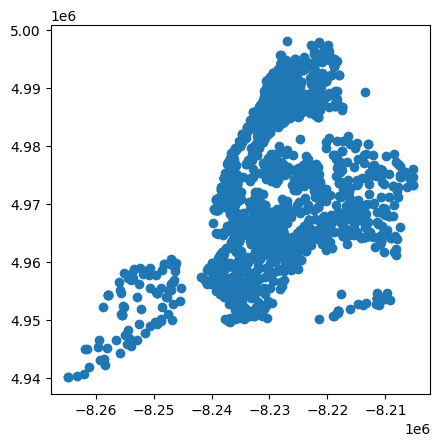

In [15]:
# Load the GeoJSON file
geojson_file = 'processed/Schools.geojson'  # Replace with the path to your GeoJSON file
data = gpd.read_file(geojson_file)

# Plot the GeoJSON data
data.plot()

# Show the plot
plt.show()

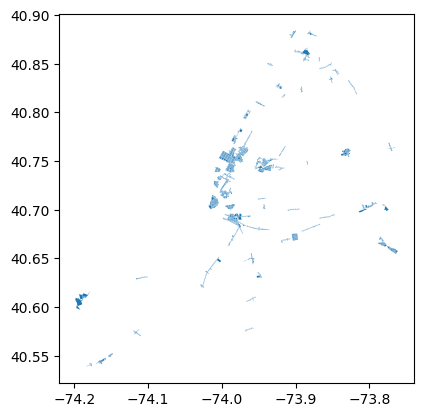

In [17]:
# Load the GeoJSON file
geojson_file = 'processed/Business Improvement Districts.geojson'  # Replace with the path to your GeoJSON file
data = gpd.read_file(geojson_file)

# Plot the GeoJSON data
data.plot()

# Show the plot
plt.show()

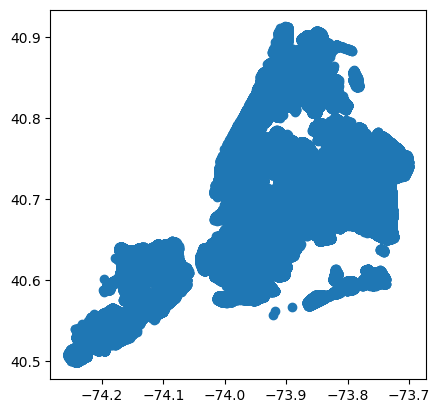

In [19]:
# Load the GeoJSON file
geojson_file = 'processed/residential_buildings.geojson'  # Replace with the path to your GeoJSON file
data = gpd.read_file(geojson_file)

# Plot the GeoJSON data
data.plot()

# Show the plot
plt.show()

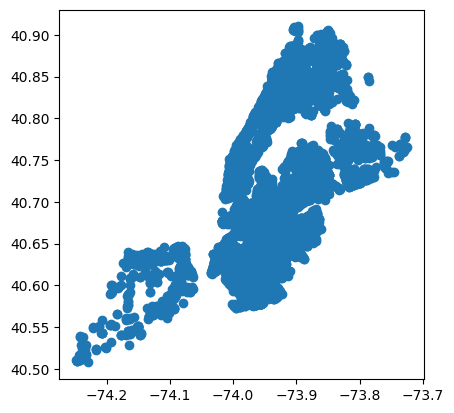

In [27]:
# Load the GeoJSON file
geojson_file = 'processed/Retail_Stores.geojson'  # Replace with the path to your GeoJSON file
data = gpd.read_file(geojson_file)

# Plot the GeoJSON data
data.plot()

# Show the plot
plt.show()

In [33]:
import geopandas as gpd

# Load the provided GeoJSON file to inspect its structure and geometry
file_path = 'processed/Retail_Stores.geojson'
gdf = gpd.read_file(file_path)

# Display the GeoDataFrame info to understand its structure and identify any issues with geometry
gdf.info(), gdf.head(), gdf.geometry.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9911 entries, 0 to 9910
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   County              9911 non-null   object  
 1   License Number      9911 non-null   object  
 2   Operation Type      9911 non-null   object  
 3   Establishment Type  9911 non-null   object  
 4   Entity Name         9911 non-null   object  
 5   DBA Name            9911 non-null   object  
 6   Street Number       9911 non-null   object  
 7   Street Name         9911 non-null   object  
 8   City                9911 non-null   object  
 9   State               9911 non-null   object  
 10  Zip Code            9911 non-null   object  
 11  geometry            9911 non-null   geometry
dtypes: geometry(1), object(11)
memory usage: 929.3+ KB


(None,
    County License Number Operation Type Establishment Type  \
 0   KINGS         763133          Store                  A   
 1   BRONX         763132          Store                  A   
 2   BRONX         763012          Store                  A   
 3   BRONX         763011          Store                  A   
 4  QUEENS         762997          Store                  A   
 
                               Entity Name                            DBA Name  \
 0                           SKILLMART INC                           SKILLMART   
 1                     ARDENT PHARMACY INC       BENJAMINS PHARMACY & SURGICAL   
 2  BALDE FAMILY GENERAL MERCHANDISING LLC  BALDE FAMILY GENERAL MERCHANDISING   
 3  ESTRELLA MEATS FRUITS & GROCERY 2 CORP   ESTRELLA MEATS FRUITS & GROCERY 2   
 4                           HUA-TE NY INC                           HUA-TE NY   
 
   Street Number    Street Name      City State Zip Code  \
 0          1010    BEDFORD AVE  BROOKLYN    NY    11205   

In [38]:
from scipy.spatial import KDTree
import numpy as np

# Reload GeoDataFrame with correct CRS in case of earlier errors
gdf = gpd.read_file(file_path)
gdf = gdf.to_crs(epsg=2263)  # Project to feet-based CRS for NYC

# Extract coordinates for distance calculations
coordinates = np.array(list(zip(gdf.geometry.x, gdf.geometry.y)))

# Build a KDTree for efficient spatial indexing
tree = KDTree(coordinates)

# Query the KDTree to find neighbors within 250 feet for each point
# We set k=20 to capture any possible dense areas; then filter by distance
distances, indices = tree.query(coordinates, k=20, distance_upper_bound=250)

# Count the number of neighbors within 250ft, excluding the store itself
neighbor_counts = [np.sum((d > 0) & (d <= 250)) for d in distances]

# Add the neighbor counts to the GeoDataFrame
gdf['store_count_within_250ft'] = neighbor_counts

# Display the result for verification
gdf[['DBA Name', 'store_count_within_250ft']].head()


,DBA Name,store_count_within_250ft
0,SKILLMART,3
1,BENJAMINS PHARMACY & SURGICAL,2
2,BALDE FAMILY GENERAL MERCHANDISING,3
3,ESTRELLA MEATS FRUITS & GROCERY 2,3
4,HUA-TE NY,3


In [39]:
gdf.to_file('nyc_filtered_with_store_counts.geojson', driver='GeoJSON')

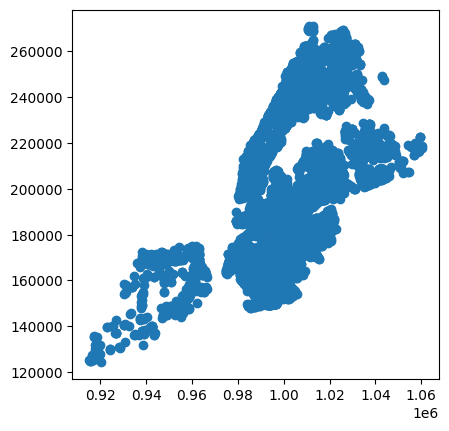

In [40]:
# Load the GeoJSON file
geojson_file = 'nyc_filtered_with_store_counts.geojson'  # Replace with the path to your GeoJSON file
data = gpd.read_file(geojson_file)

# Plot the GeoJSON data
data.plot()

# Show the plot
plt.show()

In [4]:
import geojson
import pandas as pd

# Load the GeoJSON file
with open('processed/Retail_Stores.geojson') as f:
    data = geojson.load(f)

# Filter features based on the Zip Code
filtered_features = [feature for feature in data['features'] if feature['properties']['Zip Code'] == '11101']

# Create a new GeoJSON FeatureCollection with the filtered features
filtered_geojson = {
    "type": "FeatureCollection",
    "features": filtered_features
}

# Save the filtered GeoJSON to a new file
with open('filtered_stores_11101.geojson', 'w') as f:
    geojson.dump(filtered_geojson, f)

# Display how many stores were found
print(f"Number of stores in zip code 11101: {len(filtered_features)}")


Number of stores in zip code 11101: 0
